<h1>Module 16 Project Template</h1>

Analyze the data returned by the MBTA API:

In [45]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 322,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 10,
                "direction_id": 0,
                "label": "1839",
                "latitude": 42.34178886,
                "longitude": -71.08329846,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2022-11-12T01:39:49-05:00"
            },
            "id": "y1839",
            "links": {
                "self": "/vehicles/y1839"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "188",
                        "type": "stop"
                    }
                },
                "t

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [46]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = ''
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(100)

C:\Users\reema\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
38339,38340,1,y1736,152,IN_TRANSIT_TO,NaN,1,1736,42.339607,-71.066799,MANY_SEATS_AVAILABLE,None,2022-11-11 23:41:17
38340,38341,1,y1903,200,IN_TRANSIT_TO,22.0,1,1903,42.332180,-71.081557,MANY_SEATS_AVAILABLE,None,2022-11-11 23:41:31
38341,38342,1,y1896,0,IN_TRANSIT_TO,16.0,1,1896,42.341080,-71.082505,MANY_SEATS_AVAILABLE,None,2022-11-11 23:41:04
38342,38343,1,y1879,0,IN_TRANSIT_TO,11.0,1,1879,42.349840,-71.088974,MANY_SEATS_AVAILABLE,None,2022-11-11 23:41:29
38343,38344,1,y1869,135,IN_TRANSIT_TO,1.0,1,1869,42.329830,-71.083750,None,None,2022-11-11 23:40:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,38435,1,y1822,32,IN_TRANSIT_TO,10.0,0,1822,42.341807,-71.083663,MANY_SEATS_AVAILABLE,None,2022-11-11 23:42:49
38435,38436,1,y1807,140,IN_TRANSIT_TO,9.0,1,1807,42.360792,-71.095991,MANY_SEATS_AVAILABLE,None,2022-11-11 23:42:49
38436,38437,1,y1800,340,IN_TRANSIT_TO,22.0,0,1800,42.370142,-71.113618,FEW_SEATS_AVAILABLE,None,2022-11-11 23:42:52
38437,38438,1,y1773,343,IN_TRANSIT_TO,14.0,0,1773,42.350480,-71.089314,FULL,None,2022-11-11 23:42:50



The code below saves the data as a csv file to the local directory as a backup.

In [51]:
df_bus=df.to_csv('mbta.csv')
df_bus

<h1>What is the average time it takes for a bus to complete the route</h1>

In [29]:
import pandas as pd

#reading csv 
df_bus=pd.read_csv('mbta.csv')
df_bus

,Unnamed: 0,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
0,0,1,1,y1889,132,IN_TRANSIT_TO,5.0,1,1889,42.367972,-71.107861,MANY_SEATS_AVAILABLE,NaN,11/10/2022 17:34
1,1,2,1,y1868,340,IN_TRANSIT_TO,14.0,0,1868,42.349915,-71.088979,MANY_SEATS_AVAILABLE,NaN,11/10/2022 17:34
2,2,3,1,y1855,191,IN_TRANSIT_TO,11.0,1,1855,42.349788,-71.088975,FEW_SEATS_AVAILABLE,NaN,11/10/2022 17:34
3,3,4,1,y1846,165,IN_TRANSIT_TO,13.0,1,1846,42.344328,-71.086316,MANY_SEATS_AVAILABLE,NaN,11/10/2022 17:34
4,4,5,1,y1818,301,IN_TRANSIT_TO,20.0,0,1818,42.368846,-71.109580,MANY_SEATS_AVAILABLE,NaN,11/10/2022 17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,38434,38435,1,y1822,32,IN_TRANSIT_TO,10.0,0,1822,42.341807,-71.083663,MANY_SEATS_AVAILABLE,NaN,11/11/2022 23:42
38435,38435,38436,1,y1807,140,IN_TRANSIT_TO,9.0,1,1807,42.360792,-71.095991,MANY_SEATS_AVAILABLE,NaN,11/11/2022 23:42
38436,38436,38437,1,y1800,340,IN_TRANSIT_TO,22.0,0,1800,42.370142,-71.113618,FEW_SEATS_AVAILABLE,NaN,11/11/2022 23:42
38437,38437,38438,1,y1773,343,IN_TRANSIT_TO,14.0,0,1773,42.350480,-71.089314,FULL,NaN,11/11/2022 23:42


In [30]:
#Changing column type from object to datetime for col 'updated_at'

df_tem =df_bus.astype({'updated_at':'datetime64[ns]'})
df_tem
#df_tem.dtypes

,Unnamed: 0,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
0,0,1,1,y1889,132,IN_TRANSIT_TO,5.0,1,1889,42.367972,-71.107861,MANY_SEATS_AVAILABLE,NaN,2022-11-10 17:34:00
1,1,2,1,y1868,340,IN_TRANSIT_TO,14.0,0,1868,42.349915,-71.088979,MANY_SEATS_AVAILABLE,NaN,2022-11-10 17:34:00
2,2,3,1,y1855,191,IN_TRANSIT_TO,11.0,1,1855,42.349788,-71.088975,FEW_SEATS_AVAILABLE,NaN,2022-11-10 17:34:00
3,3,4,1,y1846,165,IN_TRANSIT_TO,13.0,1,1846,42.344328,-71.086316,MANY_SEATS_AVAILABLE,NaN,2022-11-10 17:34:00
4,4,5,1,y1818,301,IN_TRANSIT_TO,20.0,0,1818,42.368846,-71.109580,MANY_SEATS_AVAILABLE,NaN,2022-11-10 17:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,38434,38435,1,y1822,32,IN_TRANSIT_TO,10.0,0,1822,42.341807,-71.083663,MANY_SEATS_AVAILABLE,NaN,2022-11-11 23:42:00
38435,38435,38436,1,y1807,140,IN_TRANSIT_TO,9.0,1,1807,42.360792,-71.095991,MANY_SEATS_AVAILABLE,NaN,2022-11-11 23:42:00
38436,38436,38437,1,y1800,340,IN_TRANSIT_TO,22.0,0,1800,42.370142,-71.113618,FEW_SEATS_AVAILABLE,NaN,2022-11-11 23:42:00
38437,38437,38438,1,y1773,343,IN_TRANSIT_TO,14.0,0,1773,42.350480,-71.089314,FULL,NaN,2022-11-11 23:42:00


In [12]:
# finding maximum stops for column current_stop_sequence

df_maxstops=df_tem['current_stop_sequence'].max()
df_maxstops

24.0

#### Above shows the max stop for Col 'current_stop_sequence ' is 24

In [38]:
#Counting no of records for each bus id

df_count=df_tem.groupby(df_tem['id'],as_index=False).count()
df_count

,id,Unnamed: 0,record_num,route_number,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
0,y1722,62,62,62,62,62,62,62,62,62,62,62,0,62
1,y1724,62,62,62,62,62,62,62,62,62,62,62,0,62
2,y1736,1544,1544,1544,1544,1544,1493,1544,1544,1544,1544,1356,0,1544
3,y1738,62,62,62,62,62,62,62,62,62,62,62,0,62
4,y1768,3572,3572,3572,3572,3572,3572,3572,3572,3572,3572,3255,0,3572
5,y1771,62,62,62,62,62,62,62,62,62,62,44,0,62
6,y1773,160,160,160,160,160,160,160,160,160,160,147,0,160
7,y1774,152,152,152,152,152,151,152,152,152,152,69,0,152
8,y1800,4220,4220,4220,4220,4220,4219,4220,4220,4220,4220,3971,0,4220
9,y1807,754,754,754,754,754,754,754,754,754,754,673,0,754


Above shows that bus_id y1869 has the maximum records. Hence, choosing y1869 for calculating average time for that bus

In [3]:
# getting data for bus id 'y1869' to calculate average time for that bus

df_tem_limit = df_tem.loc[df_tem['id']=='y1869']
df_tem_limit

,Unnamed: 0,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
766,766,767,1,y1869,99,IN_TRANSIT_TO,1.0,0,1869,42.341093,-71.057752,NaN,NaN,2022-11-11 09:21:00
768,768,769,1,y1869,141,IN_TRANSIT_TO,1.0,0,1869,42.340932,-71.057472,NaN,NaN,2022-11-11 09:21:00
770,770,771,1,y1869,179,IN_TRANSIT_TO,1.0,0,1869,42.340161,-71.057313,NaN,NaN,2022-11-11 09:21:00
772,772,773,1,y1869,180,IN_TRANSIT_TO,1.0,0,1869,42.339650,-71.057290,NaN,NaN,2022-11-11 09:21:00
774,774,775,1,y1869,218,IN_TRANSIT_TO,1.0,0,1869,42.339506,-71.057420,NaN,NaN,2022-11-11 09:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38387,38387,38388,1,y1869,135,IN_TRANSIT_TO,1.0,1,1869,42.329830,-71.083750,NaN,NaN,2022-11-11 23:41:00
38398,38398,38399,1,y1869,135,IN_TRANSIT_TO,1.0,1,1869,42.329830,-71.083750,NaN,NaN,2022-11-11 23:41:00
38409,38409,38410,1,y1869,135,IN_TRANSIT_TO,1.0,1,1869,42.329830,-71.083750,NaN,NaN,2022-11-11 23:41:00
38420,38420,38421,1,y1869,135,IN_TRANSIT_TO,1.0,1,1869,42.329830,-71.083750,NaN,NaN,2022-11-11 23:42:00


In [6]:
# Calculating average time for bus id 'y1869'

from datetime import datetime

bus=[]
yt=[]
maxtime =0;
recorded_1 = 0;
crossed_1 = 0;
crossed_24 = 0;
len_data=len(df_tem_limit.index)
#print(len_data)

#Iterating through each row for bus id 'y1869'
for index, row in df_tem_limit.iterrows():
    #print(row["current_stop_sequence"], row["updated_at"])
    
    if(row["current_stop_sequence"] == 1.0 and recorded_1 == 0):
        
        if(crossed_24==1):
            bus.append(total_time)
            crossed_24==0
            yt.append(min_time)
            #print(yt)
            
        min_time = row["updated_at"]    
        cnt = 0;
        crossed_24 = 0;
        recorded_1 = 1
        #print("min_time ",min_time)

        
    elif(row["current_stop_sequence"] > 1.0 and row["current_stop_sequence"] < 24.0):
        recorded_1 = 0;
    
    
    
    elif(row["current_stop_sequence"] == 24.0):
        
        max_time = row["updated_at"]
        total_time = max_time-min_time
        #print(total_time)
        crossed_24 = 1
                
    elif(row["current_stop_sequence"] == 24.0) and index==(len_data-1):
        bus.append(total_time)
        #crossed_24==0
        
print(bus)
#print(yt)

#Converting time(from point 1 to point 24) to seconds
sum_time = 0;
for time_taken in bus:
    sum_time = sum_time + time_taken.total_seconds()
    

#Calculating average & converting seconds into minutes
avg_time = sum_time/len(bus)
avg_min = avg_time/60
print(avg_min)

#Converting 'stop 1 data' in 'yt list' to hours:minutes:seconds for analysis 
bus_str_time=[]
for time in yt:
    bustime=time.strftime("%H:%M:%S")
    bus_str_time.append(bustime)
#print(bus_str_time)

        
        

[Timedelta('0 days 00:29:00'), Timedelta('0 days 00:38:00'), Timedelta('0 days 00:23:00'), Timedelta('0 days 00:35:00'), Timedelta('0 days 00:37:00'), Timedelta('0 days 00:49:00'), Timedelta('0 days 00:28:00'), Timedelta('0 days 00:50:00'), Timedelta('0 days 00:51:00'), Timedelta('0 days 00:41:00'), Timedelta('0 days 00:47:00'), Timedelta('0 days 00:40:00'), Timedelta('0 days 00:43:00'), Timedelta('0 days 00:46:00'), Timedelta('0 days 01:05:00'), Timedelta('0 days 00:45:00'), Timedelta('0 days 00:53:00'), Timedelta('0 days 00:35:00')]
41.94444444444444


### From above we can see different time taken by  bus Id 'y1869' for 18 trips to route 1. The average time taken by bus for completing route 1 (assuming start stop is 1 & end stop is 24) is 41.94 minutes

<h1>Provide a Visualization based on the data</h1>

## Graph 1: Different time taken to complete route 1 by bus id 'y1869'

In [16]:
# converting timedelta to minutes for bus id 'y1869'

mybuslist=[]
mybusmin=[]
sum_time = 0

#Ierating over bus list to convert time into seconds
for time_taken in bus:
    mybuslist.append(time_taken.total_seconds())

#Iterating over mybuslist to convert time from seconds to minutes     
for second in mybuslist:
    min=round(second/60,1)
    mybusmin.append(min)

#buslist=np.array(mybuslist)
print(mybusmin)

[29.0, 38.0, 23.0, 35.0, 37.0, 49.0, 28.0, 50.0, 51.0, 41.0, 47.0, 40.0, 43.0, 46.0, 65.0, 45.0, 53.0, 35.0]


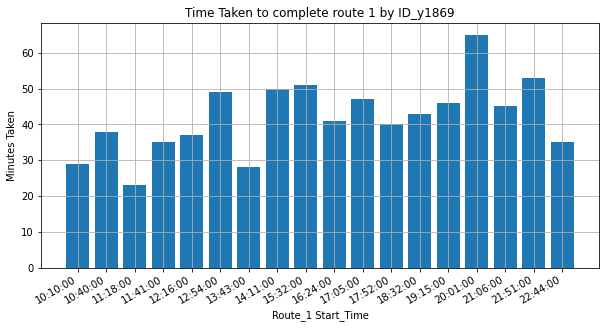

In [18]:
import matplotlib.pyplot as plt
import numpy as np


fig=plt.figure(figsize=(10,5))
plt.grid(True)
plt.bar(bus_str_time,mybusmin, linewidth='2')
plt.xlabel("Route_1 Start_Time")
plt.ylabel("Minutes Taken")
plt.title("Time Taken to complete route 1 by ID_y1869")
fig.autofmt_xdate()
plt.show()

The above graph shows data for  bus ID_y1869 for a day for 18 trips. We can see that time taken by bus ID_y1869 to complete route 1(stop 1 to 24) varies at different time with lowest at 11am(i.e. time taken is 23 minutes) & highest at 8pm(i.e. time taken is 65 minutes).

From the graph we can see following:
1. Traffic starting at 11:18 am takes less time (22 min) compared to bus starting between 10am-10:40am. This is due to the fact that office traffic reduce after 11am
2. We can see from the graph that bus starting in morning takes less time compared to evening. We can see that lowest time taken by bus is around 11 am (i.e. 22 minutes) & highest time taken is around 8pm which is 65 minutes     

Factors affecting traffic flow is commuters, office traffic, dinning, grocery shopping etc.

## Graph 2: Average time taken by each bus to complete route 1

In [20]:
#Getting unique Ids
df_tem_id = df_tem['id'].unique()
df_tem_id
#print(len(df_tem_id))

array(['y1889', 'y1868', 'y1855', 'y1846', 'y1818', 'y1771', 'y1738',
       'y1724', 'y1722', 'y1915', 'y1800', 'y1869', 'y1854', 'y1873',
       'y1896', 'y1768', 'y1774', 'y1879', 'y1822', 'y1903', 'y1866',
       'y1736', 'y1863', 'y1807', 'y1773'], dtype=object)

In [22]:
# Calculating Average time taken in minutes for each bus

allbus=[]
id_dict={}
#yt=[]

#Iterating over each unique bus id
for idnum in df_tem_id:
    #print(idnum)
    maxtime =0;
    recorded_1 = 0;
    crossed_1 = 0;
    crossed_24 = 0;
    allbus.clear()
   
    #Creating dataframe for each of busid
    df_tem_limit = df_tem.loc[df_tem['id']==idnum]
    len_data=len(df_tem_limit.index)
    
    ##Iterating over each row of bus
    for index, row in df_tem_limit.iterrows():
        #print(row["current_stop_sequence"], row["updated_at"])
        if(row["current_stop_sequence"] == 1.0 and recorded_1 == 0):
            
            if(crossed_24==1):
                allbus.append(total_time)
                #print(total_time)
        
            min_time = row["updated_at"]
            cnt = 0;
            crossed_24 = 0;
            recorded_1 = 1
            crossed_1 = 1;
            #print("min_time ",min_time)


        elif(row["current_stop_sequence"] > 1.0 and row["current_stop_sequence"] < 24.0):
            recorded_1 = 0;
            


        elif(row["current_stop_sequence"] == 24.0):

            max_time = row["updated_at"]
            total_time = max_time-min_time
            if(crossed_1 == 1):
                crossed_24 = 1
                crossed_1 = 0

        elif(row["current_stop_sequence"] == 24.0) and index==(len_data-1):
            allbus.append(total_time)
            crossed_24=0
 

    #print(allbus)
    
    #Looping over 'allbus' & converting time to seconds
    sum_time=0
    for time_taken in allbus:
            sum_time = sum_time + time_taken.total_seconds()
    #print("sum_time",sum_time, "idnum",idnum)
    
    #Calculating average time for bus & converting time to minutes
    if len(allbus)>0:
        #id_dict[idnum]=0
        avg_time = sum_time/len(allbus)
        avg_min = avg_time//60
        #print("avg_min",avg_min, "idnum", idnum)
        id_dict[idnum]=avg_min
print(id_dict)


{'y1800': 51.0, 'y1869': 41.0, 'y1854': 47.0, 'y1873': 23.0, 'y1896': 44.0, 'y1768': 43.0, 'y1879': 48.0, 'y1822': 56.0, 'y1903': 52.0, 'y1866': 43.0, 'y1736': 45.0, 'y1863': 67.0, 'y1807': 40.0}


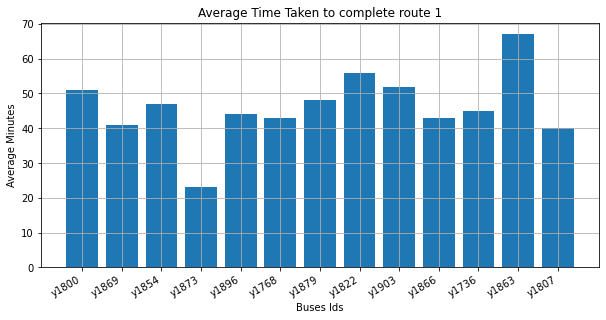

In [24]:
import matplotlib.pyplot as plt
import numpy as np


fig=plt.figure(figsize=(10,5))
plt.grid(True)
plt.bar(range(len(id_dict)), list(id_dict.values()), align='center')
plt.xticks(range(len(id_dict)),list(id_dict.keys()))
plt.xlabel("Buses Ids")
plt.ylabel("Average Minutes")
plt.title("Average Time Taken to complete route 1")
fig.autofmt_xdate()
plt.show()

Assumptions: I have only considered data for buses which has completed route 1 (i.e. stop 1 to 24)
    
From above graph we can see that on an average it takes around 40 to 50 minutes for a bus to complete route 1.
We see that 'y1873' took lowest 23 minutes & 'y1863' took highest 67 minutes on an average. 

This can be due to number of factors:
1. Bus timings i.e. y1863 running only at peak traffic hours & y1873 running at low traffic hours
2. Speed of the bus
3. Weather conditions or any accidents
4. Any special events(such as concert) which may contribute in increased timings for buses

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [26]:
# Calculating time(hours) & start/ end points for latitude, longitude for stop 1 & 24

speeddict={}
#Looping over bus ids
for idnum in df_tem_id:
    #print(idnum)
    maxtime =0;
    recorded_1 = 0;
    crossed_1 = 0;
    crossed_24 = 0;
    
   
    #looping over each row of bus & setting conditions
    df_tem_limit = df_tem.loc[df_tem['id']==idnum]
    len_data=len(df_tem_limit.index)
    
    for index, row in df_tem_limit.iterrows():
        #print(row["current_stop_sequence"], row["updated_at"])
        
        if(row["current_stop_sequence"] == 1.0 and recorded_1 == 0):
            
            if(crossed_24==1):
                speeddict[idnum]=[lat1,long1,lat2,long2,tim_hr]
                break

     
            lat1 = row["latitude"]
            long1 = row["longitude"]
            min_time = row["updated_at"]
            cnt = 0;
            crossed_24 = 0;
            recorded_1 = 1
            crossed_1 = 1;
            #print("min_time ",min_time)


        elif(row["current_stop_sequence"] > 1.0 and row["current_stop_sequence"] < 24.0):
            recorded_1 = 0;
            



        elif(row["current_stop_sequence"] == 24.0):

            lat2 = row["latitude"]
            long2 = row["longitude"]
            max_time = row["updated_at"]
            time_taken = max_time-min_time
            time_sec=time_taken.total_seconds()
            tim_min=time_sec//60
            tim_hr=tim_min/60

            if(crossed_1 == 1):
                crossed_24 = 1
                crossed_1 = 0

        #elif(row["current_stop_sequence"] == 24.0) and index==(len_data-1):
         #   speeddict[idnum]=[lat1,long1,lat2,long2]
          #  crossed_24=0
            
print(speeddict)

{'y1800': [42.34078, -71.05749, 42.37308664, -71.11770598, 0.7], 'y1869': [42.37302845, -71.11754255, 42.32991848, -71.08432754, 0.48333333333333334], 'y1854': [42.37287991, -71.11701297, 42.33003529, -71.08433362, 0.5833333333333334], 'y1873': [42.32985092, -71.08347055, 42.37312025, -71.11735888, 0.38333333333333336], 'y1896': [42.34065, -71.05812, 42.3728763, -71.11673537, 0.75], 'y1768': [42.37299802, -71.11735169, 42.33046, -71.08374092, 0.55], 'y1879': [42.34109, -71.05768, 42.37302918, -71.11749878, 0.8833333333333333], 'y1822': [42.37324632, -71.11731711, 42.33040904, -71.08382387, 0.5666666666666667], 'y1903': [42.33023625, -71.08413882, 42.37277495, -71.11679981, 0.75], 'y1866': [42.32977591, -71.08369258, 42.37309221, -71.11755641, 0.6], 'y1736': [42.33898676, -71.05818089, 42.3728198, -71.11706397, 0.9], 'y1863': [42.37306276, -71.11739174, 42.33027953, -71.08425318, 0.7833333333333333], 'y1807': [42.32992645, -71.08429661, 42.3728363, -71.11708293, 0.7333333333333333]}


In [27]:
# Calculating speed using distance & time

from math import radians, cos, sin, asin, sqrt

#import haversine
#from haversine import haversine, Unit

disdict={}
for idnum in speeddict:
    lat1=speeddict[idnum][0]
    lon1=speeddict[idnum][1]    
    lat2=speeddict[idnum][2]
    lon2=speeddict[idnum][3]
    tim=speeddict[idnum][4]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles.
    
    dis=round(c * r,1)
    speed=round(dis/tim,1)
    #print(dis,tim)
    disdict[idnum]=speed
    
print(disdict)

{'y1800': 8.7, 'y1869': 11.4, 'y1854': 9.4, 'y1873': 14.6, 'y1896': 8.0, 'y1768': 10.0, 'y1879': 6.9, 'y1822': 9.7, 'y1903': 7.2, 'y1866': 9.3, 'y1736': 6.8, 'y1863': 7.0, 'y1807': 7.5}


#### Above calculation shows speed of each bus in km/hr from current_stop_sequence 1 to current_stop_sequence 24 for route 1.